In [18]:
lines = open("subjective_eval.txt").read().splitlines()
print(lines) #read subjective_eval.txt

['This was by far one of the most fun and intuitive classes I have taken here at pacific. The professors teaching style and commitment exceeded my expectations.', 'Great class!', '', 'You do not need more office hours. You need more useful office hours.', '', "Please do not send out important assignment updates through Canvas only. You should amend the original assignment description so we don't have to dig through", 'our messages to find the single one in which you changed it. Please proof-read your slides to remove errors from them.', '', 'Although I realize the amount of effort you put in preparing and executing lectures, I just wish the content posted online were as effective as the lectures because I', 'simply learn more efficiently on my own. I also learn code better reading from my screen than reading from a board or projector. Would be nice if examples in class', 'and solutions to discussion questions were posted online too. Of course this would not encourage class participatio

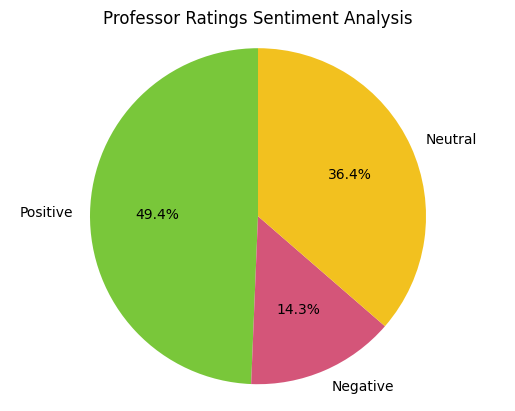

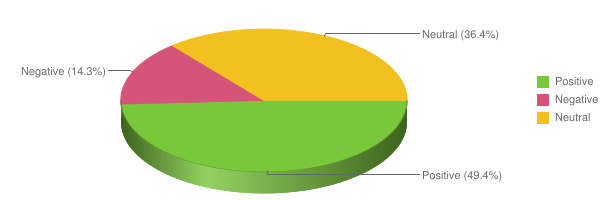

In [20]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Get the sentiment scores for each rating
scores = [sia.polarity_scores(line) for line in lines]

# Count the number of positive, negative, and neutral reviews
pos_count = sum(1 for score in scores if score['compound'] > 0)
neg_count = sum(1 for score in scores if score['compound'] < 0)
neu_count = sum(1 for score in scores if score['compound'] == 0)
#neu_count = sum(1 for score in scores if -0.01 <= score['compound'] <= 0.01)

# Calculate the percentages
total_count = len(lines)
pos_percent = pos_count / total_count * 100
neg_percent = neg_count / total_count * 100
neu_percent = neu_count / total_count * 100

# Create the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [pos_percent, neg_percent, neu_percent]
colors = ['#79c73a', '#d45579', '#f2c11f']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
plt.axis('equal')
plt.title('Professor Ratings Sentiment Analysis')
plt.show()

# Create 3D pie chart
from pygooglechart import PieChart3D

chart = PieChart3D(600, 200) # initialize chart object, 250 x 250 pixels

# pass your data to the chart object
chart.add_data(sizes)

# make labels for the slices
label_data = ['{} ({:.1f}%)'.format(labels[i], sizes[i]) for i in range(len(labels))]
chart.set_pie_labels(label_data)
chart.set_legend(labels)
chart.set_colours(['79c73a', 'd45579', 'f2c11f'])
chart.download('Professor_Ratings_Sentiment_Analysis.png')
# print(type(chart))

# render the image
from IPython.display import Image

img = Image("Professor_Ratings_Sentiment_Analysis.png")
#display(img)




In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Create an empty list to store the extracted tokens
tokens = []

# Get the set of English stopwords
stop_words = set(stopwords.words("english"))

# Open the file and read the lines
with open("subjective_eval.txt") as f:
    lines = f.read().splitlines()

# Loop through the lines and extract the tokens
for line in lines:
    # Tokenize the line into words
    words = word_tokenize(line)
    
    # Loop through the words and extract the meaningful ones
    for i, word in enumerate(words):
        # Check if the word is preceded by "not"
        if i > 0 and words[i-1] == "not":
            tokens.append("not " + word)
        # Check if the word is an adjective or adverb
        elif nltk.pos_tag([word])[0][1] in ["JJ", "JJR", "JJS", "RB", "RBR", "RBS", "VB", "VBD", "VBG", "VBN", "VBP",]:
             # Check if the word is not a stopword
            if word not in stop_words:
                tokens.append(word)

# Print the extracted tokens
print(tokens)

['far', 'intuitive', 'taken', 'teaching', 'exceeded', 'not need', 'useful', 'Please', 'not send', 'important', 'original', "n't", 'find', 'single', 'changed', 'Please', 'remove', 'realize', 'preparing', 'executing', 'posted', 'effective', 'simply', 'efficiently', 'also', 'better', 'nice', 'posted', 'not encourage', 'learning', 'setting', 'teaching', 'not know', 'enough', 'several', 'not answer', 'fundamental', 'regarding', 'used', 'go', 'discussed', 'next', 'completely', 'next', 'solid', 'coding', 'done', 'utilize', 'trying', 'going', 'knowledgeable', 'really', 'clear', 'nice', 'good', 'letting', 'highly', 'invested', 'noticed', 'take', 'go', 'extra', 'coming', 'checking', 'comprehensible', 'engaging', 'including', 'optimistic', 'rigorous', 'always', 'available', 'consistently', 'challenging', 'sometimes', 'difficult', 'accordingly', 'not remove', 'many', 'little', 'reasonable', 'helping', 'encouraging', 'always', 'available', 'usually', 'early', 'late', 'never', 'twice', 'checking', '

Sentiment score: 0.05061726907630523
{'neg': 0.118, 'neu': 0.586, 'pos': 0.296, 'compound': 0.9954}
The sentiment of this text is mainly POSITIVE.


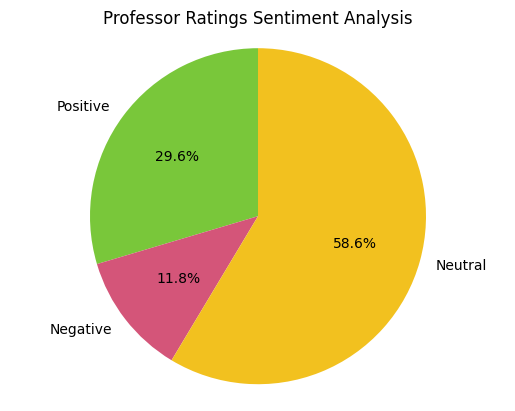

In [4]:
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Loop through the tokens and get the sentiment scores
sentiment_scores = []
for token in tokens:
    score = analyzer.polarity_scores(token)
    sentiment_scores.append(score)

# Compute the overall sentiment score
compound_score = sum([s['compound'] for s in sentiment_scores]) / len(sentiment_scores)

# Print the results
print(f"Sentiment score: {compound_score}")


# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Calculate the sentiment score for the text
sentiment_score = sid.polarity_scores(' '.join(tokens))

# Print the sentiment score
print(sentiment_score)

# Print the overall sentiment
if sentiment_score['compound'] > 0:
    print('The sentiment of this text is mainly POSITIVE.')
elif sentiment_score['compound'] < 0:
    print('The sentiment of this text is mainly NEGATIVE.')
else:
    print('The sentiment of this text is mainly NEUTRAL.')
    
# Define the data for the pie chart
labels = ['Positive', 'Negative', 'Neutral']
data = [sentiment_score['pos'], sentiment_score['neg'], sentiment_score['neu']]

# Create the pie chart
colors = ['#79c73a', '#d45579', '#f2c11f']
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90,  colors = colors)
plt.axis('equal')

# Add a title
plt.title('Professor Ratings Sentiment Analysis')

# Show the plot
plt.show()

In [5]:
from nltk.corpus import wordnet
from pprint import pprint

# function to get the synset of a word
def get_synset(word):
    synsets = wordnet.synsets(word)
    return synsets[0] if synsets else None

# function to get the hypernym of a synset
def get_hypernym(synset):
    return synset.hypernyms()[0] if synset and synset.hypernyms() else None

# group similar meaning tokens into a generalized group
def group_tokens(tokens):
    groups = {}
    for token in tokens:
        if "not" in token:
            token = token.replace("not ", "un")
        synset = get_synset(token)
        if synset:
            hypernym = get_hypernym(synset)
            if hypernym:
                group_name = hypernym.name().split('.')[0]
                if group_name not in groups:
                    groups[group_name] = [token]
                else:
                    groups[group_name].append(token)
    return groups
groups = group_tokens(tokens)
pprint(groups)

{'accept': ['believe'],
 'achiever': ['great'],
 'act': ['taken', 'trying', 'going', 'engaging', 'trying', 'took', 'going'],
 'action': ['taking'],
 'actor': ['extra'],
 'advantage': ['good'],
 'affix': ['posted', 'posted'],
 'analyze': ['checking', 'checking'],
 'attempt': ['best', 'best'],
 'autoimmune_disease': ['less'],
 'base_hit': ['single'],
 'basic_cognitive_process': ['learning', 'learning', 'learning'],
 'change': ['preparing'],
 'change_state': ['became'],
 'contest': ['challenging', 'challenging', 'challenging', 'challenging'],
 'control': ['handled'],
 'conversation': ['talking', 'talking'],
 'corporal_punishment': ['executing'],
 'cover': ['discussed'],
 'creation': ['original'],
 'day': ['even'],
 'degree': ['high'],
 'distance': ['remove'],
 'education': ['teaching', 'teaching', 'teaching'],
 'end': ['last', 'last', 'completed'],
 'engineering': ['computing'],
 'environment': ['setting'],
 'excavation': ['well', 'well'],
 'express': ['stated'],
 'fact': ['specific', 'pa

In [6]:
# import matplotlib.pyplot as plt

# def plot_bubbles(groups):
#     group_sizes = [len(tokens) for tokens in groups.values()]
#     group_names = list(groups.keys())

#     fig, ax = plt.subplots()
#     ax.scatter(group_names, [1]*len(group_names), s=group_sizes, alpha=0.5)

#     for i, size in enumerate(group_sizes):
#         ax.annotate(f'{size}', (group_names[i], 1))

#     plt.show()
# plot_bubbles(groups)

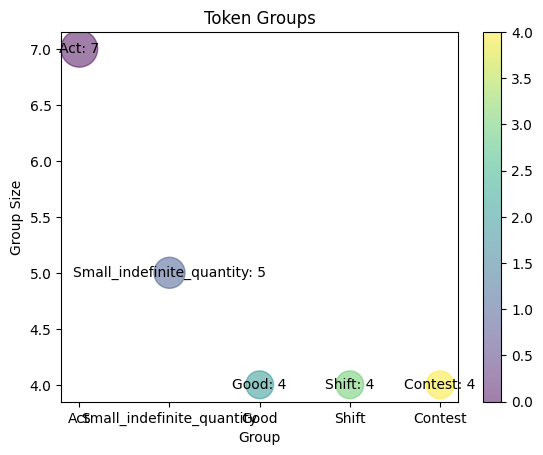

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# def plot_groups(groups):
#     sorted_groups = sorted(groups.items(), key=lambda x: len(x[1]), reverse=True)
#     top_groups = sorted_groups[:5]
#     sizes = [len(tokens) for _, tokens in top_groups]
#     labels = [name.capitalize() for name, _ in top_groups]
#     plt.scatter(labels, sizes, s=[i*100 for i in sizes], alpha=0.5)
#     plt.title('Token Groups')
#     plt.xlabel('Group')
#     plt.ylabel('Group Size')
#     for i, (name, tokens) in enumerate(top_groups):
#         plt.annotate(f"{name.capitalize()}: {len(tokens)}", (i, len(tokens)), ha='center', va='center')
#     plt.show()

def plot_groups(groups):
    sorted_groups = sorted(groups.items(), key=lambda x: len(x[1]), reverse=True)
    top_groups = sorted_groups[:5]
    sizes = [len(tokens) for _, tokens in top_groups]
    labels = [name.capitalize() for name, _ in top_groups]
    colors = np.arange(len(labels))
    plt.scatter(labels, sizes, s=[i*100 for i in sizes], c=colors, alpha=0.5, cmap='viridis')
    plt.title('Token Groups')
    plt.xlabel('Group')
    plt.ylabel('Group Size')
    for i, (name, tokens) in enumerate(top_groups):
        plt.annotate(f"{name.capitalize()}: {len(tokens)}", (i, len(tokens)), ha='center', va='center')
    plt.colorbar()
    plt.show()
    
plot_groups(groups)

## Word2Vec

In [8]:
import numpy as np
import pandas as pd
import string
from tqdm import tqdm
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [9]:
with open('stopwords.txt') as f:
    stopwords = f.read().replace('\n',' ').split()
with open('subjective_eval.txt', encoding='utf-8') as f:
    text = f.read().replace('\n','')
    print(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([t for t in text if t not in list('0123456789')])
    text = text.replace('”', '').replace('“', '').replace('’', '').lower().split()

text = [w for w in text if w not in stopwords][:2000]

This was by far one of the most fun and intuitive classes I have taken here at pacific. The professors teaching style and commitment exceeded my expectations.Great class!You do not need more office hours. You need more useful office hours.Please do not send out important assignment updates through Canvas only. You should amend the original assignment description so we don't have to dig throughour messages to find the single one in which you changed it. Please proof-read your slides to remove errors from them.Although I realize the amount of effort you put in preparing and executing lectures, I just wish the content posted online were as effective as the lectures because Isimply learn more efficiently on my own. I also learn code better reading from my screen than reading from a board or projector. Would be nice if examples in classand solutions to discussion questions were posted online too. Of course this would not encourage class participation and attendance, but I just feel like lea

## Prepare Training Data

In [10]:
WINDOW_SIZE = 3 # 3 words before and after the main word
NUM_NEGATIVE_SAMPLES = 3 #for each main word, we include 3 examples not in its context 

data = []

#iterate over all words
for idx,center_word in enumerate(text[WINDOW_SIZE-1:-WINDOW_SIZE]):
    
    #iterate over the context words around the center word
    context_words = [context_word for context_word in text[idx:idx+2*WINDOW_SIZE-1] if context_word != center_word]
    for context_word in context_words:
        
        #get words NOT in the current context as negative examples
        data.append([center_word, context_word, 1])
        negative_samples = np.random.choice([w for w in text[WINDOW_SIZE-1:-WINDOW_SIZE] if w != center_word and w not in context_words], NUM_NEGATIVE_SAMPLES)
        
        for negative_samp in negative_samples:
            
            #add a training row
            data.append([center_word, negative_samp, 0])
            
df = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)
#label = whether or not the  those two things actually appear together within the window size
words = np.intersect1d(df.context_word, df.center_word)
df = df[(df.center_word.isin(words)) & (df.context_word.isin(words))].reset_index(drop=True)
df

,center_word,context_word,label
0,fun,difficult,0
1,fun,wish,0
2,fun,futureaspirations,0
3,fun,one,1
4,fun,tutorials,0
...,...,...,...
10424,final,something,0
10425,final,pursue,1
10426,final,code,0
10427,final,handled,0


In [11]:
def sigmoid(v, scale=1):
    return 1 / (1 + np.exp(-scale*v))

# 1 iteration of going through all of the examples in our training data and updating our vectors accordingly
def update_embeddings(df, main_embeddings, context_embeddings, learning_rate, debug=False):
    
    #get differences between main embeddings and corresponding context embeddings
    main_embeddings_center = main_embeddings.loc[df.center_word].values
    context_embeddings_context = context_embeddings.loc[df.context_word].values
    diffs = context_embeddings_context - main_embeddings_center
    
    #get similarities, scores, and errors between main embeddings and corresponding context embeddings
    #orthogonal vectors dot product
    dot_prods = np.sum(main_embeddings_center * context_embeddings_context, axis=1)
    scores = sigmoid(dot_prods)
    errors = (df.label - scores).values.reshape(-1,1)
    
    #calculate updates
    updates = diffs*errors*learning_rate # KEY LINE
    #the difference between each pair of vectors so we want to update in the direction of those differences 
    # to bridge gaps that should be bridged and make gaps wider that should be not close together
    #the errors is the magnitude of how aggressive we want to be for example if we have two vectors like this and the
    # error between them is very large then we want to bring them a lot closer together if two vectors are already
    # pretty close together then we want to bring them just a little bit closer so we're updating proportional 
    # to what the error currently is and the learning rate is just a user-defined parameter
    # we'll be using 0.1 in this video about how fast you want the algorithm to go
    updates_df = pd.DataFrame(data=updates)
    updates_df['center_word'] = df.center_word
    updates_df['context_word'] = df.context_word
    updates_df_center = updates_df.groupby('center_word').sum()
    updates_df_context = updates_df.groupby('context_word').sum()
    
    if debug:
        plot_words(debug)
    
    #apply updates
    main_embeddings += updates_df_center.loc[main_embeddings.index]
    context_embeddings -= updates_df_context.loc[context_embeddings.index]
    
    #normalize embeddings (avoid vectors from getting too big. Instead we brings them all to the unit hypersphere)
    main_embeddings = normalize_data(main_embeddings)
    context_embeddings = normalize_data(context_embeddings)
    
    #return the updated embeddings
    return main_embeddings, context_embeddings

def normalize_data(data):
    row_norms = np.sqrt((data.values**2).sum(axis=1)).reshape(-1,1)
    return data.divide(row_norms, axis='index')

def plot_words(debug):
    plt.figure(figsize=(8,4))
    
    plt.subplot(1,2,1)
    lim_main_first = main_embeddings.loc[[debug[0]]]
    lim_main_second = main_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main_first[0], lim_main_first[1], color='r')
    plt.arrow(0,0,float(lim_main_first[0]), float(lim_main_first[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_first.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_main_second[0], lim_main_second[1], color='r')
    plt.arrow(0,0,float(lim_main_second[0]), float(lim_main_second[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_second.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], main_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    t = np.arange(0, 3.14*2+0.1, 0.1)
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    ###################################
    
    plt.subplot(1,2,2)
    lim_main = main_embeddings.loc[[debug[0]]]
    lim_context = context_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main[0], lim_main[1], color='r')
    plt.arrow(0,0,float(lim_main[0]), float(lim_main[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_context[0], lim_context[1], color='b')
    plt.arrow(0,0,float(lim_context[0]), float(lim_context[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_context.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], context_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    plt.show()


### Run Word2Vec

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


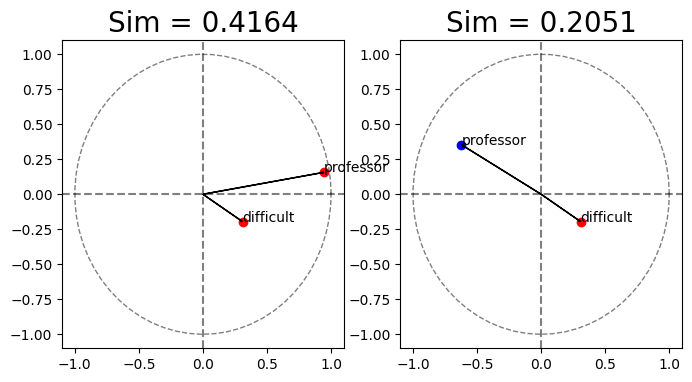

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


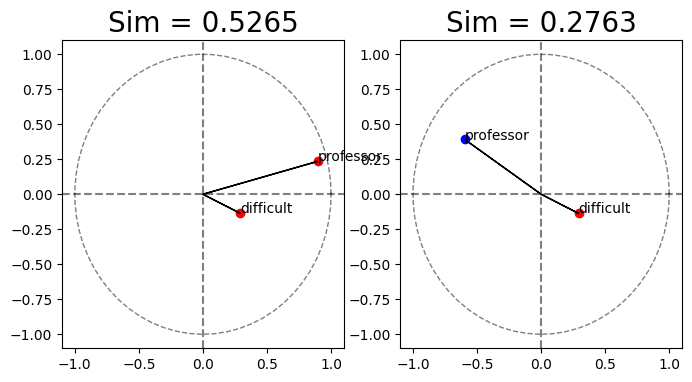

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


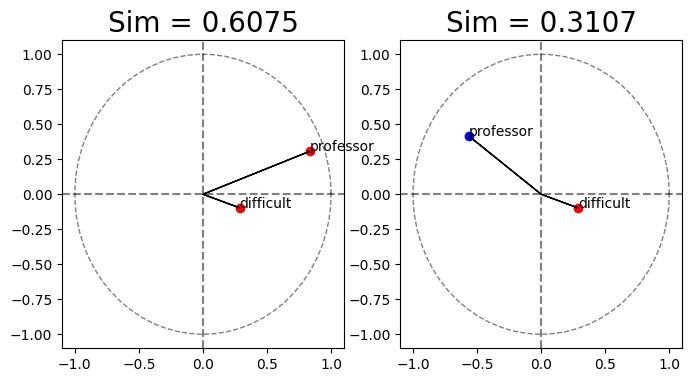

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


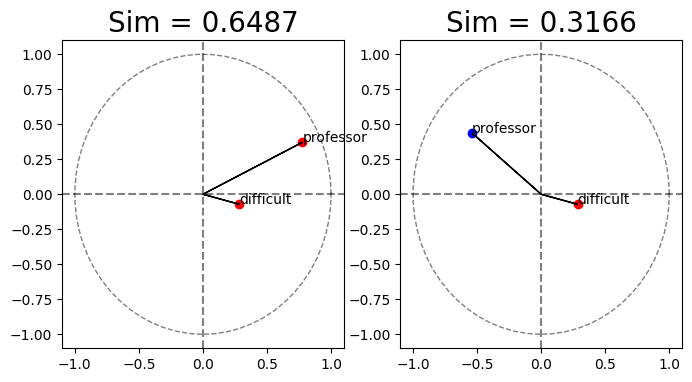

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


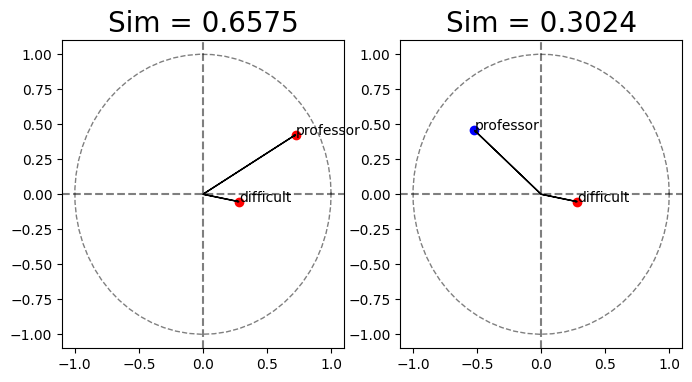

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


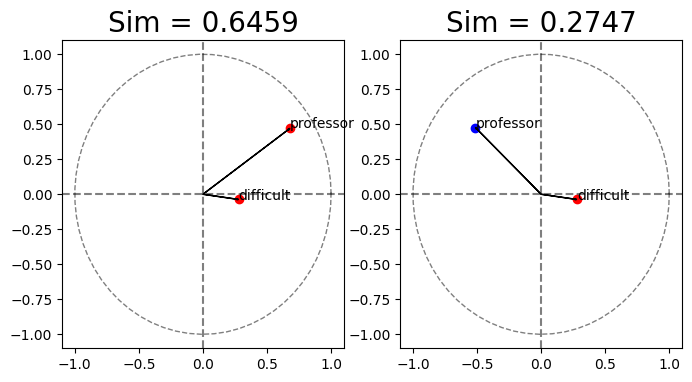

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


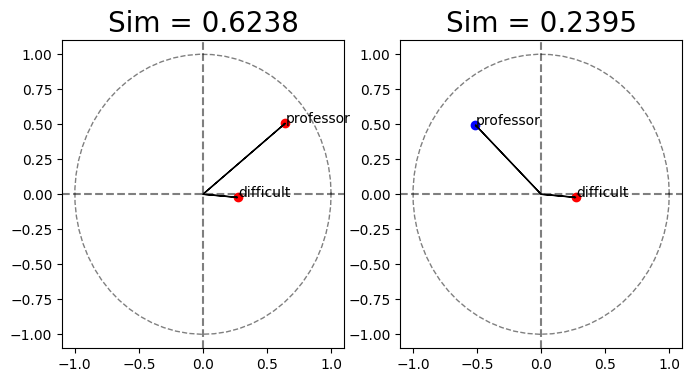

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


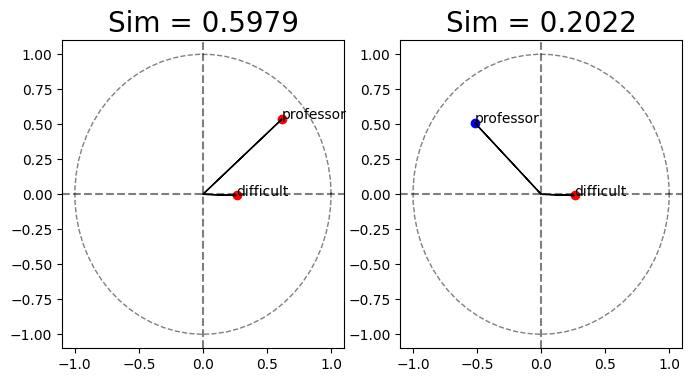

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


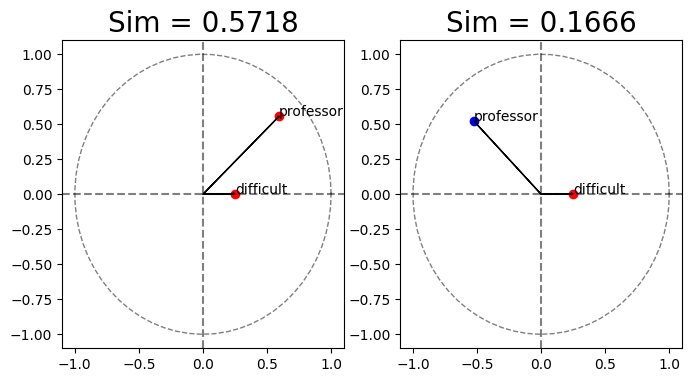

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


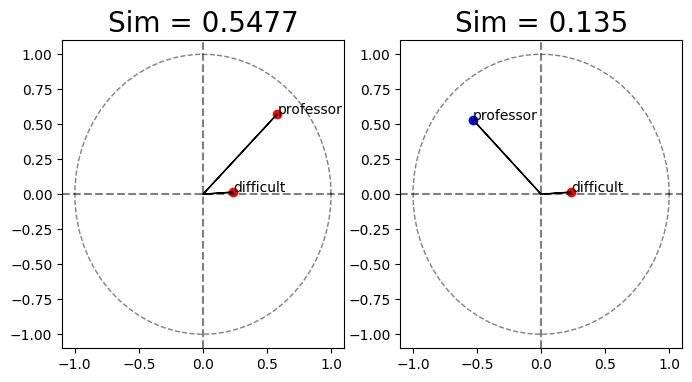

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


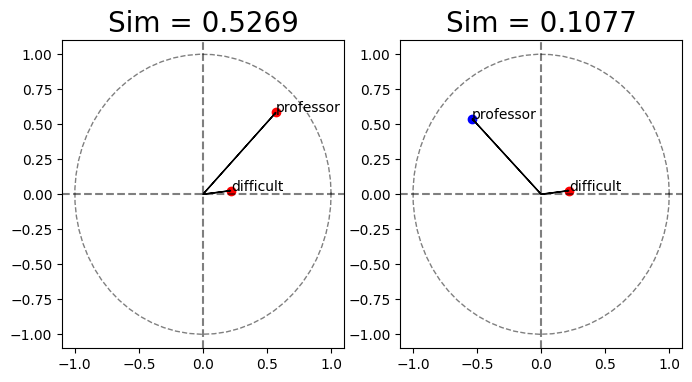

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


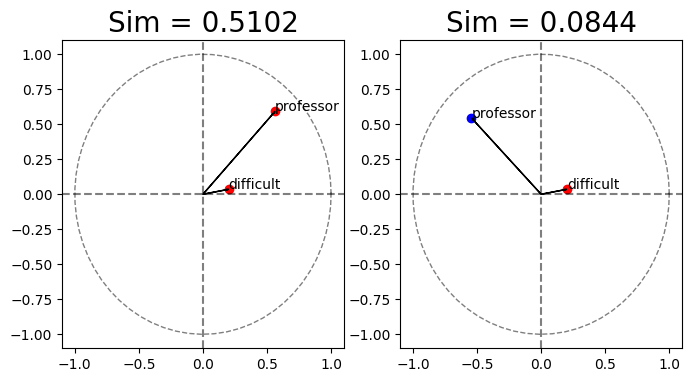

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


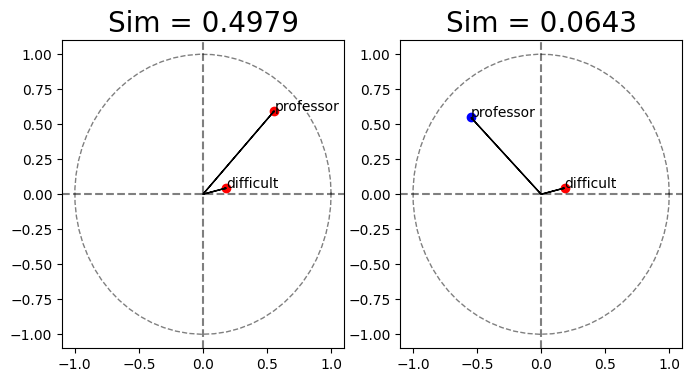

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


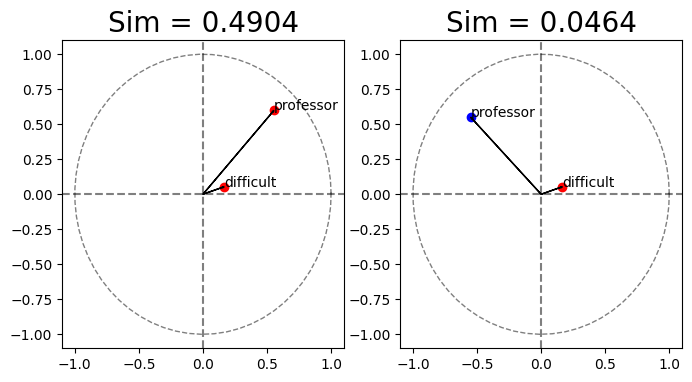

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


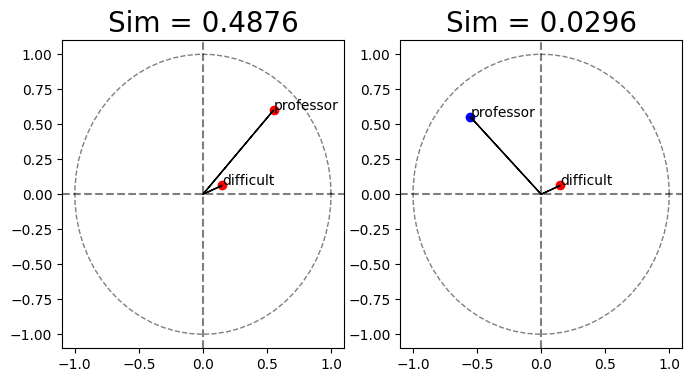

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


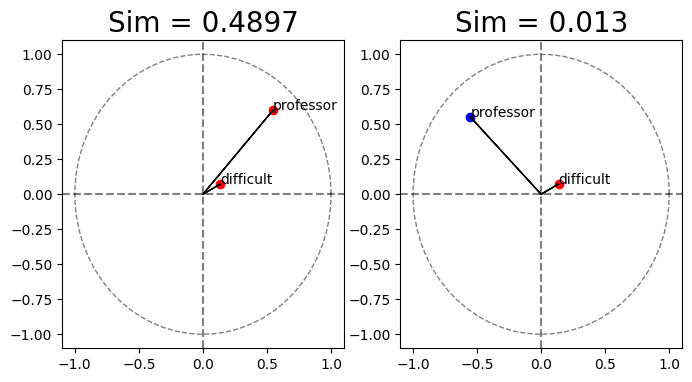

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


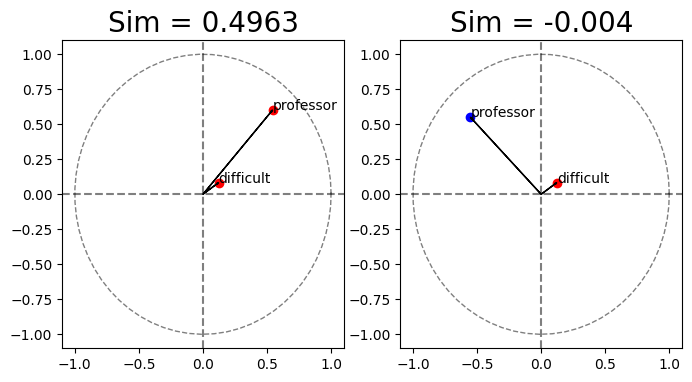

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


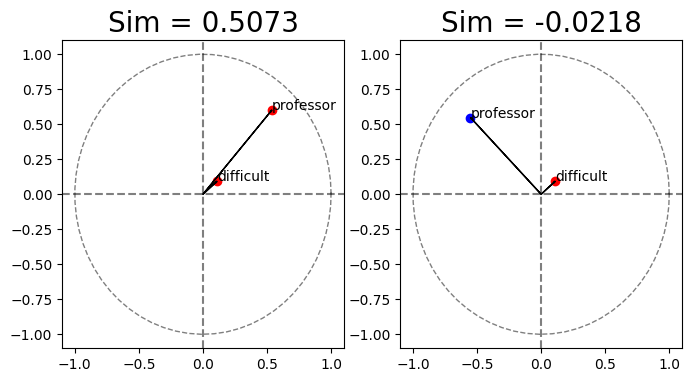

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


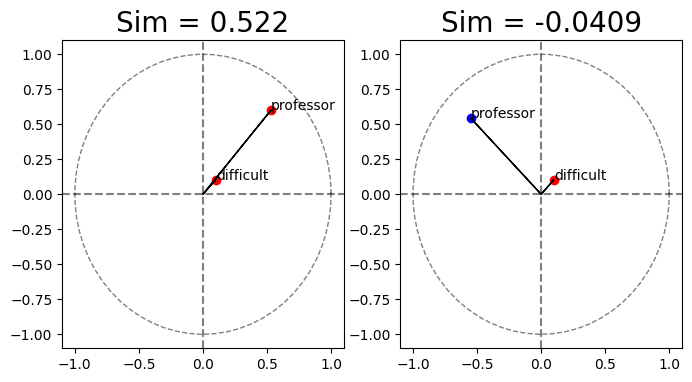

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


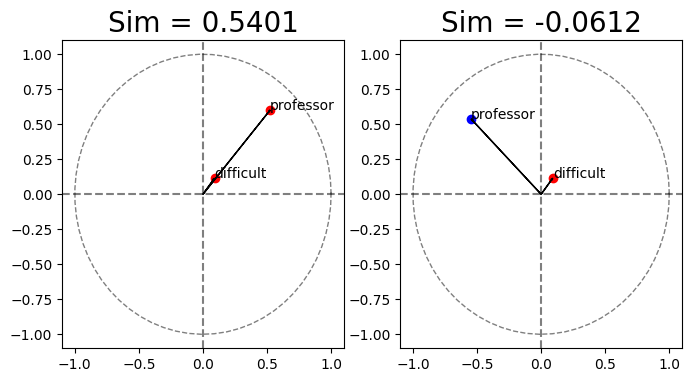

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


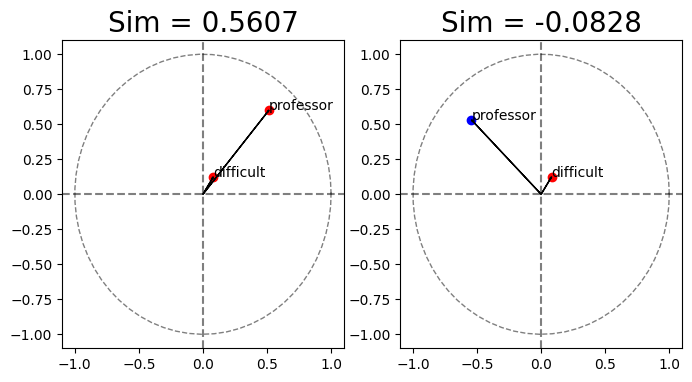

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


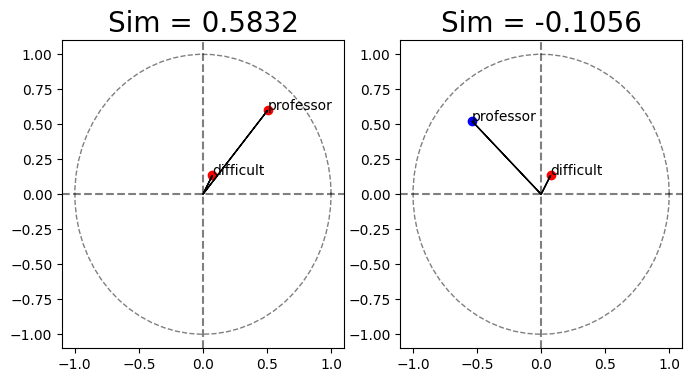

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


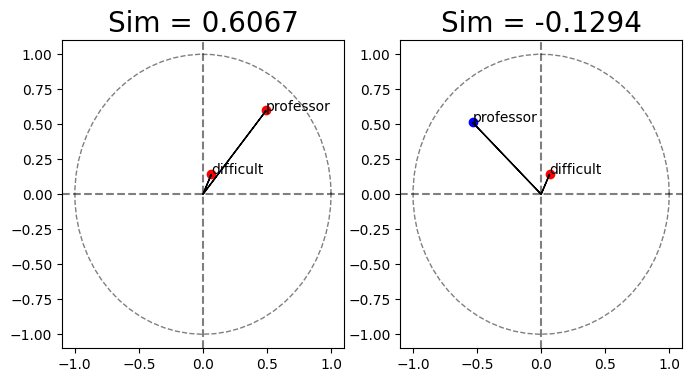

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


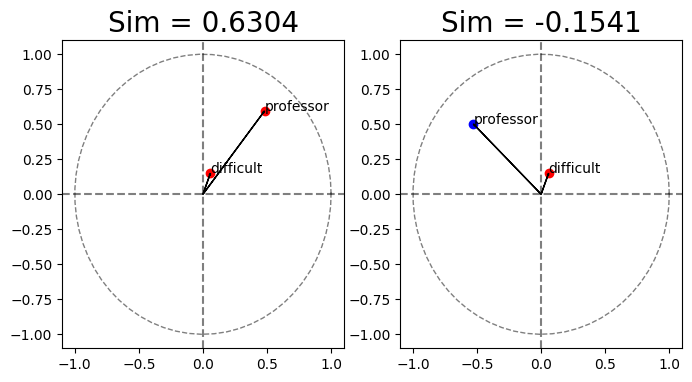

/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_center = updates_df.groupby('center_word').sum()
/var/folders/7p/4d8f_fhn7v79rzvdk6h1f_t00000gn/T/ipykernel_32830/3730014976.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  updates_df_context = updates_df.groupby('context_word').sum()


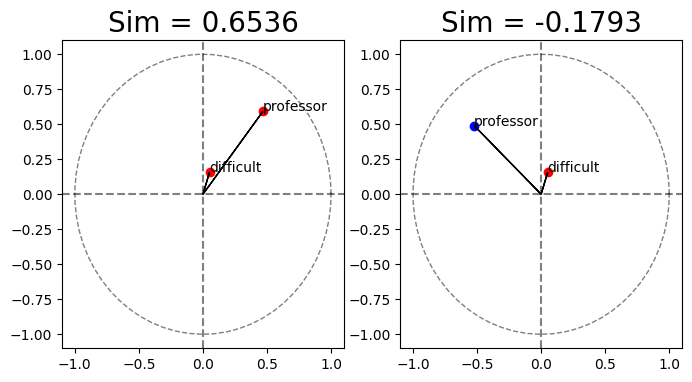

In [12]:
EMBEDDING_SIZE = 5  #dimensions

main_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((main_embeddings**2).sum(axis=1)).reshape(-1,1)
main_embeddings = main_embeddings / row_norms

context_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((context_embeddings**2).sum(axis=1)).reshape(-1,1)
context_embeddings = context_embeddings / row_norms

main_embeddings = pd.DataFrame(data=main_embeddings, index=words)
context_embeddings = pd.DataFrame(data=context_embeddings, index=words)

for _ in range(25):
    main_embeddings, context_embeddings = update_embeddings(df, main_embeddings, context_embeddings, 0.1, ['difficult', 'professor'])

# red = main vectors (the one that we keep at the end), blue = context vectors


In [13]:
L = []
for w1 in words:
    for w2 in words:
        if w1 != w2:
            sim = 1 - cosine(main_embeddings.loc[w1], main_embeddings.loc[w2])
            L.append((w1,w2,sim))
            
sorted([item for item in L if item[0] == 'course'], key=lambda t: -t[2])[:30]

#sorted based on highest similarity on top

[('course', 'easily', 0.9132033095773038),
 ('course', 'including', 0.8997758613016718),
 ('course', 'college', 0.8994578174894543),
 ('course', 'three', 0.8894722340841569),
 ('course', 'howto', 0.8863992923512245),
 ('course', 'transition', 0.873031171829082),
 ('course', 'high', 0.852252594325648),
 ('course', 'highly', 0.8490662361892006),
 ('course', 'intuitive', 0.8463083352826697),
 ('course', 'exhibited', 0.8429251763117014),
 ('course', 'problems', 0.8360629048035858),
 ('course', 'single', 0.8325455405942065),
 ('course', 'completed', 0.827655171171434),
 ('course', 'lectures', 0.827377209369893),
 ('course', 'dig', 0.8248727860830669),
 ('course', 'invested', 0.8171360962522942),
 ('course', 'wish', 0.8124180911441142),
 ('course', 'inefficientpassionate', 0.8090891876665427),
 ('course', 'handoutssupportive', 0.7994731867663897),
 ('course', 'forletting', 0.7941845027064428),
 ('course', 'weeks', 0.7938542454485034),
 ('course', 'amount', 0.7909468793449709),
 ('course', 'u

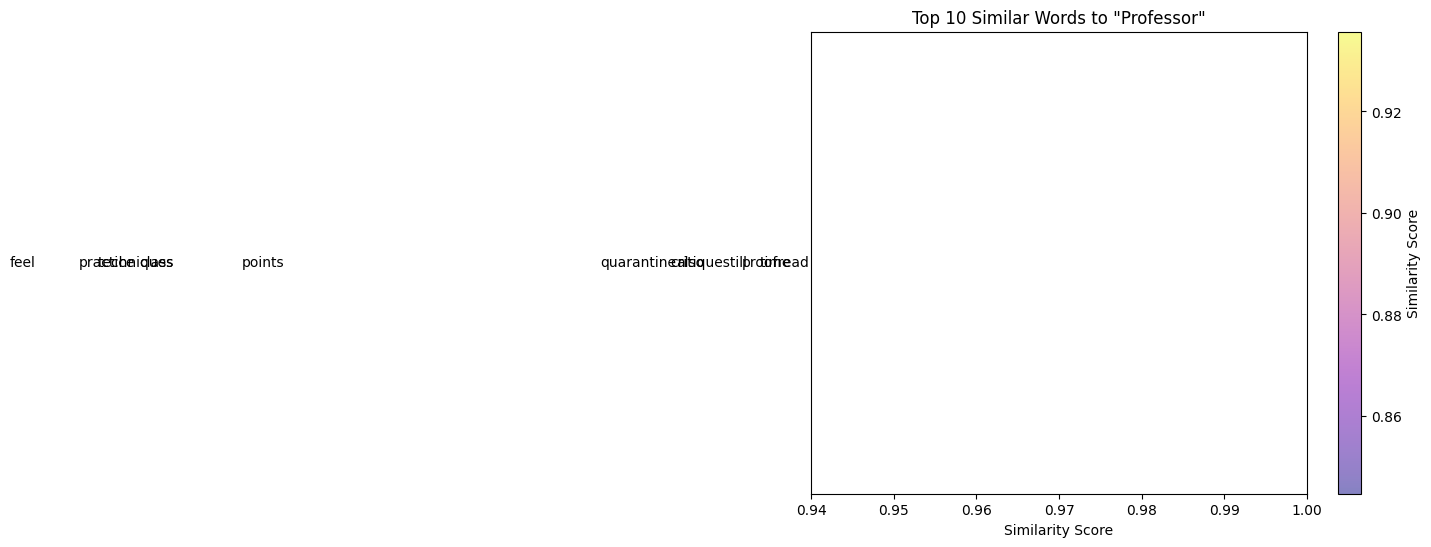

In [14]:
import matplotlib.pyplot as plt

# Create a dictionary to store the frequency of each word in words
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Extract the similarity scores for pairs containing the word "professor"
professor_pairs = [item for item in L if item[0] == 'professor']
professor_pairs_sorted = sorted(professor_pairs, key=lambda t: -t[2])[:10]

# Extract the frequencies of the words in words
word_freqs = [word_freq[pair[1]] for pair in professor_pairs_sorted]

# Extract the associated keywords for each bubble
keywords = [pair[1] for pair in professor_pairs_sorted]

# Set the size of each bubble proportional to the word frequency
bubblesSizes = [freq * 700 for freq in word_freqs]

# Set the color of each bubble proportional to the similarity score
colors = [pair[2] for pair in professor_pairs_sorted]

# Plot the data using a scatter plot
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter([pair[2] for pair in professor_pairs_sorted], [1]*10, s=bubblesSizes, alpha=0.5, c=colors, cmap='plasma')
for i, keyword in enumerate(keywords):
    plt.text(professor_pairs_sorted[i][2], 1, keyword, ha='center', va='center')
plt.xlabel('Similarity Score')
plt.title('Top 10 Similar Words to "Professor"')

# Add a colorbar to show the range of similarity scores
cbar = fig.colorbar(scatter)
cbar.set_label('Similarity Score')
plt.xlim(0.94, 1)
plt.ylim(0.95, 1.050)
plt.yticks([])

plt.show()


### Visualize of the embeddings

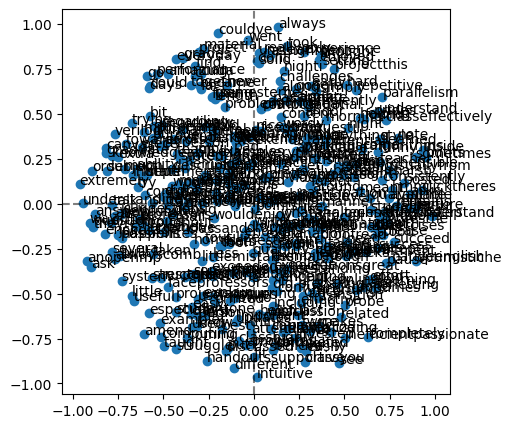

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transf_embeddings = pca.fit_transform(main_embeddings.values)
words_used = main_embeddings.index

plt.figure(figsize=(5,5))
plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

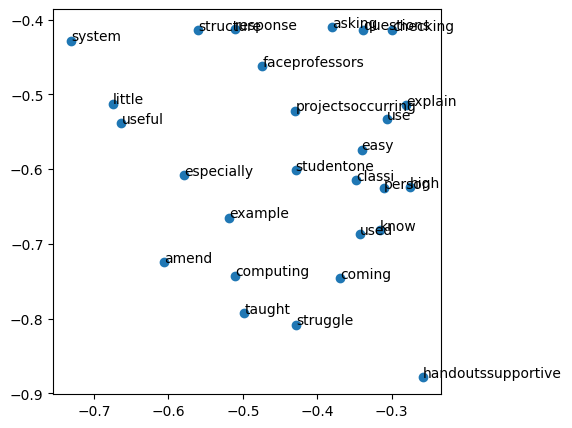

In [16]:
plt.figure(figsize=(5,5))

#ZOOM IN
chosen_idxs = (transf_embeddings[:,0] < -.25) & (transf_embeddings[:,1] < -0.4)
transf_embeddings = transf_embeddings[chosen_idxs]
words_used = words_used[chosen_idxs]

plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))

In [17]:
## positive and negative tokens that appears often (top 30) // Professor and Course